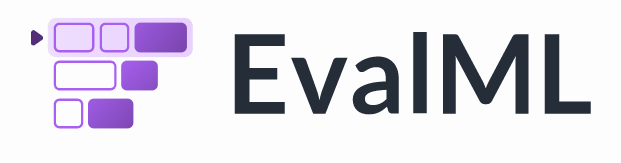

In [1]:
!pip install evalml

In [2]:
from urllib.request import urlopen
import pandas as pd

input_data = urlopen('https://featurelabs-static.s3.amazonaws.com/spam_text_messages_modified.csv')
data = pd.read_csv(input_data)
data.head()

,Category,Message
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,FreeMsg Hey there darling it's been 3 week's n...
2,spam,WINNER!! As a valued network customer you have...
3,spam,Had your mobile 11 months or more? U R entitle...
4,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [3]:
### Independent And Dependent Features
X=data.drop('Category',axis=1)
y=data['Category']

In [4]:
X.head()

,Message
0,Free entry in 2 a wkly comp to win FA Cup fina...
1,FreeMsg Hey there darling it's been 3 week's n...
2,WINNER!! As a valued network customer you have...
3,Had your mobile 11 months or more? U R entitle...
4,"SIX chances to win CASH! From 100 to 20,000 po..."


In [8]:
y.value_counts(normalize=True)

ham     0.750084
spam    0.249916
Name: Category, dtype: float64

In [9]:
import evalml

In [10]:
#### TRain A\nd test data split
X_train,X_test,y_train,y_test=evalml.preprocessing.split_data(X,y,problem_type='binary')

In [12]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [14]:
X_train.head()

Data Column,Message
Physical Type,string
Logical Type,NaturalLanguage
Semantic Tag(s),[]
562,"Haha I heard that, text me when you're around"
1253,I'm thinking that chennai forgot to come for a...
1816,Can you tell Shola to please go to college of ...
2054,K k pa Had your lunch aha.
511,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323


In [15]:
from evalml import AutoMLSearch

In [19]:
automl=AutoMLSearch(X_train=X_train,y_train=y_train,problem_type='binary',max_batches=1,optimize_thresholds=True)

Generating pipelines to search over...


In [20]:
automl.search()

*****************************
* Beginning pipeline search *
*****************************

Optimizing for Log Loss Binary. 
Lower score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: lightgbm, catboost, decision_tree, random_forest, linear_model, extra_trees, xgboost



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Batch 1: (1/9) Mode Baseline Binary Classification P... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 8.638
Batch 1: (2/9) Decision Tree Classifier w/ Text Feat... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.802
High coefficient of variation (cv >= 0.2) within cross validation scores. Decision Tree Classifier w/ Text Featurization Component may not perform as estimated on unseen data.
Batch 1: (3/9) LightGBM Classifier w/ Text Featuriza... Elapsed:00:13
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.215
High coefficient of variation (cv >= 0.2) within cross validation scores. LightGBM Classifier w/ Text Featurization Component may not perform as estimated on unseen data.
Batch 1: (4/9) Extra Trees Classifier w/ Text Featur... Elapsed:00:26
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.252
High coefficient of variation (cv >= 

In [21]:
automl.rankings

,id,pipeline_name,score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,7,Random Forest Classifier w/ Text Featurization...,0.154849,0.110302,98.207418,True,{'Random Forest Classifier': {'n_estimators': ...
1,6,XGBoost Classifier w/ Text Featurization Compo...,0.178639,0.113254,97.932010,True,"{'XGBoost Classifier': {'eta': 0.1, 'max_depth..."
2,8,Logistic Regression Classifier w/ Text Featuri...,0.214011,0.165624,97.522538,True,{'Logistic Regression Classifier': {'penalty':...
3,2,LightGBM Classifier w/ Text Featurization Comp...,0.214580,0.136260,97.515944,True,{'LightGBM Classifier': {'boosting_type': 'gbd...
4,3,Extra Trees Classifier w/ Text Featurization C...,0.252206,0.216198,97.080377,True,{'Extra Trees Classifier': {'n_estimators': 10...
5,5,CatBoost Classifier w/ Text Featurization Comp...,0.526403,0.512717,93.906174,False,"{'CatBoost Classifier': {'n_estimators': 10, '..."
6,4,Elastic Net Classifier w/ Text Featurization C...,0.542803,0.529152,93.716325,False,"{'Elastic Net Classifier': {'alpha': 0.5, 'l1_..."
7,1,Decision Tree Classifier w/ Text Featurization...,0.801766,0.555179,90.718481,True,{'Decision Tree Classifier': {'criterion': 'gi...
8,0,Mode Baseline Binary Classification Pipeline,8.638305,8.623860,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [22]:
automl.best_pipeline

GeneratedPipeline(parameters={'Random Forest Classifier':{'n_estimators': 100, 'max_depth': 6, 'n_jobs': -1},})

In [23]:
best_pipeline = automl.best_pipeline

In [24]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])

************************************************************
* Random Forest Classifier w/ Text Featurization Component *
************************************************************

Problem Type: binary
Model Family: Random Forest

Pipeline Steps
1. Text Featurization Component
2. Random Forest Classifier
	 * n_estimators : 100
	 * max_depth : 6
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 13.2 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary  Sensitivity at Low Alert Rates # Training # Validation
0                      0.110       0.895 0.987      0.938 0.921                     0.942            0.961                           0.246   1594.000      797.000
1                      0.144       0.854 0.980      0.919 0.888                     0.917            0.946                           0.246   1594.000      797.000
2                    

In [ ]:
### Evaluate on the test data

In [27]:
scores = best_pipeline.score(X_test, y_test,  objectives=evalml.objectives.get_core_objectives('binary'))
print(f'Accuracy Binary: {scores["Accuracy Binary"]}')

Accuracy Binary: 0.9732441471571907
